 # Final Report NLP Project

<div class="alert alert-info">

# Executive Summary:
### Goals

The goal of this classification project is to first identify key words of the programming language and create a machine learning model that can effectly predict the programming language used.

### Key Findings

* ...

* ...

* ...



### Recommendation
    
* ...
    
* ...
    
* ...
    


## **Project Goals:**

The goal of this classification project is to first identify key words of the programming language and create a machine learning model that can effectly predict the programming language used.

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import prepare as p
import acquire as a
import explore as e
import model as m
randomseed = 123

import warnings
warnings.filterwarnings("ignore")


In [3]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 22})
plt.rc('lines', linewidth = 5)


# Acquire:

Used function within module file aquire.py to webscrape ReadMe links from github repositories trending as "most starred". 1000 urls were sucessfuly obtained and then saved into a local csv file 'urls_final.csv'.

Performed customized webscrape of url_final file to create usable dataframe that extracts the text and primary language used within each ReadMe. This was also saved into a local file csv 'readme_df.csv'.

* Data acquired through webscraping methods from GitHub on January 11, 2023 at 10pm and saved into readme_df.csv file

* The data set contains 1000 rows and 3 columns before cleaning

* Each row represents a link to a Githubs ReadMe repository that is trending "most starred"

* Each column represents a feature from one Githubs ReadMe repository

In [4]:
# acquire readme data
df = pd.read_csv('readme_df.csv')

# Prepare:

prepare actions:

* Removed duplicate rows 
* Removed all Null values 
* Removed irrelevant rows:
    * Kept only the top 4 programming languages resulting in a total of 377 observations
* Convert text to all lower case for normalcy.
* Removed any accented characters, non-ASCII characters.
* Removed special characters.
* Lemmatize the words.
    * Remove stopwords.
    * Store the clean text and the original text for use in future notebooks.
* Split data into train, validate and test 
    * Approximately: train 56%, validate 24%, test 20%
    * Stratified on 'language'
    
* We ended up with 377 usable observations in our dataframe


###                                                        <h1><center>Data Dictionary</center></h1>     
| Feature | Definition |
| :- | :- |
| repo |url link for githubs most starred repositories|
| language | Primary language of Repository|
| readme_content| Text found inside the readme |


In [5]:
# cleaning data
df = p.data_prep(df)

# prepare text for exploration 
df = p.text_prep(df)


# split data: train, validate and test
train, validate, test = p.split_data(df, 'language')

# Explore:

## What language is most commonly used in our dataset?

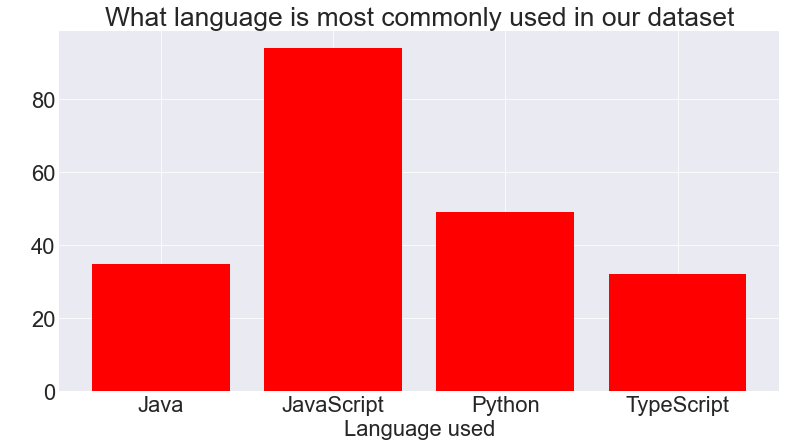

In [6]:
#obtain viz
e.bar_common_language(train)

 * It appears that the most common language used is JavaScript

## What is the average word count for each language?

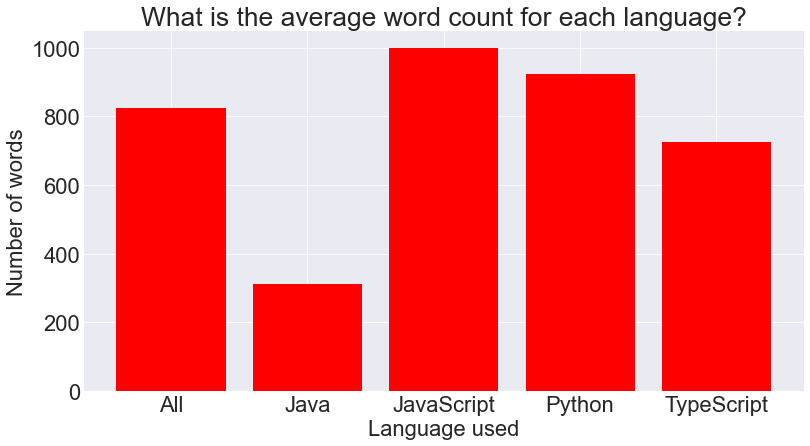

In [11]:
# Obtain viz
JavaScript_words, Java_words, Python_words, TypeScript_words, all_words = e.number_words(train)
JavaScript_freq, Java_freq, Python_freq, TypeScript_freq, all_freq = e.frequency_of_words(JavaScript_words, Java_words, Python_words, TypeScript_words, all_words)
e.bar_average_word(train, JavaScript_freq, Java_freq, Python_freq, TypeScript_freq, all_freq)

* JavaScript, Python, and TypeScript are very close to the mean while Java is significantly lower

#### I will now conduct a T-test to test for a significant difference between the mean of all and Java

* The confidence interval is 95%
* Alpha is set to 0.05 
* p/2 will be compared to alpha

$H_0$: If p is more than 0.05 then number of words is not significant

$H_a$: If p is less than 0.05 then number of words is significant

In [12]:
# Stats T-Test result
e.get_chi_language(train)

chi^2 = 630.0000
p     = 0.4588


##### The p-value/2 is more than 0.05 therefore it is not significant

## Is there a difference in sentiment by language?

In [8]:
# create sentimate dataframe for 
sentiment_df = train[['language','clean_text']]

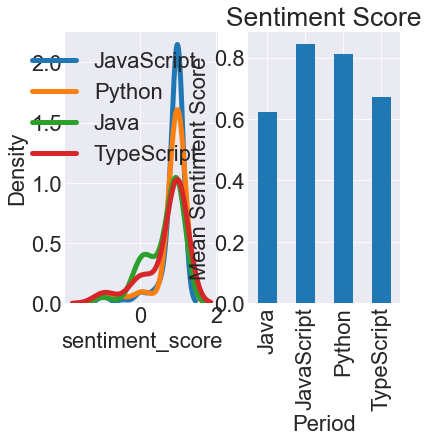

In [22]:
# Obtain viz
e.get_sentiment(sentiment_df)

* **We can see that JavaScript seems to have the most positive sentimate score than the rest of the languages**

**I will now conduct a T-test to test for a significant difference between the mean of ....**

* The confidence interval is 95%
* Alpha is set to 0.05 
* p/2 will be compared to alpha

$H_0$: abcdfe.. == abcdfe..

$H_a$: abcdfe. != abcdfe..

In [ ]:
# Stats T-Test result
e.get_ttest_...

The p-value/2 is .... **There is  evidence to support that ....** Based on this statistical finding I believe ....


## Top 10 words used across the board?

In [ ]:
# Obtain viz
e.get_...

* **We can see that...**

##  Proportion of Python vs JavaScript for the 20 most common words

In [ ]:
# Obtain Viz
e.get_...

* **It seems that ...**

## 20 Most frequently occuring JavaScript bigrams VS Python bigrams

In [ ]:
# Obtain Viz
e.get_...

* **It seems that ...**

# Exploration Summary

* a
* b
* c


# Features that will be included in my model

* **a**  has a ...
* **b**  has a ...
* **c**  has a ...


# Features that will be not included in my model

* **a** did not have...
* **Ob** have unknow ...


# Modeling:

* Accuracy is the metric use in the models.
    * Accuracy helps gauge the percentage of correct predictions

* Baseline will be 45 % accuracy:
    * Since the biggest language in our data set is JavaScript
    * And JavaScript makes up 45% of the data 
    * by guessing the primary language is JavaScript we will be correct 45% of the time
    
* I will evaluate my top model of Decision Tree, KNN, and Logistic Regression on train and validate data
* The model that performs the best will then be evaluated on test data

In [ ]:
df

In [ ]:
# prep data for modeling
X_train,y_train,X_validate,y_validate, X_test, y_test= m. model_prep(train,validate,test)

In [ ]:
X_train

## Decision Tree

In [ ]:
# Get Decision Tree results
m.get_tree_model(x_train,y_train,x_validate,y_validate)

**The accuracy of the Decision Tree model is above the baseline in both train and validate.** 

## KNN

In [ ]:
# Get KNN model results
m.get_knn_model(x_train,y_train,x_validate,y_validate)

**The accuracy of the KNN is above the baseline in both train and validate.** 

## Logistic Regression

In [ ]:
# Get Logic Regression model results
m.get_logit_model(x_train,y_train,x_validate,y_validate)

**The accuracy of the Logistic Regression model is above the baseline in both train and validate.** 

# Comparing Models

* ...
* ...
* ...

# Top Model on Test data

In [ ]:
m.get_...(x_train,y_train,x_test,y_test, True)

## Modeling Summary

* model abc...

* model abc...

# Conclusion

## Exploration



* ..
* a
* b

## Modeling

**The final model performed ....**

## Recommendations

* a
* b
* c

## Next Steps

* a
* b
* c